## Реестр заблокированных политический ресурсов

Итак, первый шаг, это найти список запрещенки. Роскомнадзор его не предоставляет, зато есть сервис по мониторингу интернета OONI https://explorer.ooni.org/country/RU

Используем API оттуда чтобы получить список запрещенных сайтов.

In [1]:
# Данные
#
# https://api.ooni.io/api/_/website_networks?probe_cc=RU
# http://pravo.minjust.ru/extremist-materials?combine=&page=307

### Open Observatory of Network Interference

In [2]:
from apis import ooni

In [3]:
asn_list = ooni.list_asn()

In [4]:
asn_list[:5]

[12389, 8402, 25513, 48642, 42387]

**Тесты по блокировкам для одного провайдера**

In [5]:
# links = ooni.fetch_ooni(asn_list[:5])

In [6]:
# У нас уже есть загруженные данные
import json
f = open('data/01-ooni-asn-links.json')
links = json.load(f)

## Список заблокированных ресурсов по версии OONI

In [7]:
import itertools
from urllib.parse import urlparse

links_set = set([urlparse(link['input']).netloc for link in itertools.chain(*links.values()) if link['anomaly_count'] > 0])

links_set

{'www.babyplan.ru',
 'go.com',
 'www.advocate.com',
 'www.dns-shop.ru',
 'utronews.org',
 'www.chechentimes.net',
 'xxx.lanl.gov',
 'iarf.net',
 'www.huffingtonpost.com',
 'www.refugeesinternational.org',
 'edge-chat.instagram.com',
 'www.teenhealthfx.com',
 'www.overdrive.com',
 'stalinism.ru',
 'www.secfirst.org',
 'www.bahai.org',
 'www.pdhre.org',
 'www.inbox.com',
 'psyplants.info',
 'www.anglicancommunion.org',
 'avaaz.org',
 'www.hon.ch',
 'adengo.ru',
 'ru.onlinecasinos5.ru',
 'www.fergananews.com',
 'radiofreetexas.org',
 'vimeo.com',
 'www.sina.com.cn',
 'molodost.bz',
 'www.nbc.com',
 'www.linkedin.com',
 'tochka.net',
 'hrlibrary.umn.edu',
 'hackers.com',
 'www.advocatesforyouth.org',
 'torrentz.eu',
 'www.ceceurope.org',
 'www.economist.com',
 'roskomsvoboda.org',
 'www.who.int',
 'vkrugudruzei.ru',
 'www.piratpartiet.se',
 'ru.m.wikisource.org',
 'www.metal-archives.com',
 'www.aljazeera.net',
 'clubhouse.pubnub.com',
 'www.womensmediacenter.com',
 'allo.google.com',
 'ww

Теперь попробуем для каждого построить временной ряд блокировок

Соберём данные по провайдеру 12389

In [8]:
# from progress.bar import Bar

# data_by_domain = {}

# for domain in Bar('BlocksByTime', check_tty=False).iter(links_set):
#     data_by_domain[domain] = ooni.get_blocked_url_data(asn_list[0], domain)

In [9]:
# У нас уже есть загруженные данные
f = open('data/02-domain-by-time.json')
data_by_domain = json.load(f)

Когда тот или иной домен был заблокирован

In [10]:
block_timeline = []

for domain, data in data_by_domain.items():
    d = [d['measurement_start_time'] for d in data if d['anomaly'] == True]
    if len(d) > 0:
        block_timeline.append((domain, d[-1]))

In [11]:
from dateutil.parser import parse

pd_data = []

for domain, data in data_by_domain.items():
    for date in [parse(d['measurement_start_time']) for d in data if d['anomaly'] == True and d['confirmed']==True]:
        pd_data.append({'date': date, 'domain': domain})

In [12]:
import pandas as pd

df = pd.DataFrame(pd_data)

<AxesSubplot:title={'center':'Число (новых) блокировок доменов'}, xlabel='date'>

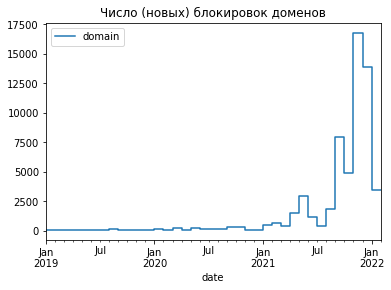

In [13]:
df[(df['date'] > '2019-01-01')] \
    .groupby(pd.Grouper(key='date', freq='M')).count() \
    .plot(drawstyle="steps", title="Число (новых) блокировок доменов")

**Идентификаторы провайдеров, по которым собирается статистика**

### РосКомСвобода

In [31]:
from apis import rks

links = rks.fetch_rks()

# Сохраним полученные данные

import json
with open('data/03-rks.json', 'w') as fp:
    json.dump(links, fp,  indent=4)

BlocksByTimeRKS |################################| 10000/10000


In [15]:
# У нас уже есть загруженные данные
f = open('data/04-rks.json')
rks_data = json.load(f)

In [20]:
import pandas as pd

df = pd.DataFrame(rks_data, columns=['date', 'domain', 'department'])

In [25]:
df['date'] =  pd.to_datetime(df['date'])

In [30]:
df.date.min()

Timestamp('2020-01-05 00:00:00')